In [4]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import re
import string

from tensorflow.keras import layers
from tensorflow.keras import losses

%matplotlib inline

In [5]:
df_VidGames = pd.read_csv('amazon_reviews_us_Digital_Video_Games_v1_00.tsv.gz', sep='\t', compression='gzip', error_bad_lines=False)

print ('Data read into a pandas dataframe!')

C:\Users\ady.setya\AppData\Local\Temp\ipykernel_9232\1153170563.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_VidGames = pd.read_csv('amazon_reviews_us_Digital_Video_Games_v1_00.tsv.gz', sep='\t', compression='gzip', error_bad_lines=False)


Data read into a pandas dataframe!


In [6]:
df_VidGames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144724 entries, 0 to 144723
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   marketplace        144724 non-null  object
 1   customer_id        144724 non-null  int64 
 2   review_id          144724 non-null  object
 3   product_id         144724 non-null  object
 4   product_parent     144724 non-null  int64 
 5   product_title      144724 non-null  object
 6   product_category   144724 non-null  object
 7   star_rating        144724 non-null  int64 
 8   helpful_votes      144724 non-null  int64 
 9   total_votes        144724 non-null  int64 
 10  vine               144724 non-null  object
 11  verified_purchase  144724 non-null  object
 12  review_headline    144722 non-null  object
 13  review_body        144722 non-null  object
 14  review_date        144721 non-null  object
dtypes: int64(5), object(10)
memory usage: 16.6+ MB


In [7]:
df_VidGames.shape

(144724, 15)

In [8]:
df_VidGames.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,21269168,RSH1OZ87OYK92,B013PURRZW,603406193,Madden NFL 16 - Xbox One Digital Code,Digital_Video_Games,2,2,3,N,N,A slight improvement from last year.,I keep buying madden every year hoping they ge...,2015-08-31
1,US,133437,R1WFOQ3N9BO65I,B00F4CEHNK,341969535,Xbox Live Gift Card,Digital_Video_Games,5,0,0,N,Y,Five Stars,Awesome,2015-08-31
2,US,45765011,R3YOOS71KM5M9,B00DNHLFQA,951665344,Command & Conquer The Ultimate Collection [Ins...,Digital_Video_Games,5,0,0,N,Y,Hail to the great Yuri!,If you are prepping for the end of the world t...,2015-08-31
3,US,113118,R3R14UATT3OUFU,B004RMK5QG,395682204,Playstation Plus Subscription,Digital_Video_Games,5,0,0,N,Y,Five Stars,Perfect,2015-08-31
4,US,22151364,RV2W9SGDNQA2C,B00G9BNLQE,640460561,Saints Row IV - Enter The Dominatrix [Online G...,Digital_Video_Games,5,0,0,N,Y,Five Stars,Awesome!,2015-08-31


In [9]:
df_VidGames.tail()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
144719,US,53011810,R2G7DI8NYXZB5R,B001AUEITS,163061733,Crazy Machines 2 [Download],Digital_Video_Games,4,2,3,N,N,Worked first try for me,"I was worried due to the 2 reviews I saw here,...",2008-12-25
144720,US,53094564,R3QRKP4DS759BP,B001AU6TQ8,801870836,Crazy Machines 1 - The Wacky Contraptions Game...,Digital_Video_Games,1,13,16,N,N,"The Software May be Great, But I'll Never Know",I downloaded this as a Christmas present for m...,2008-12-24
144721,US,37181147,R24K4C0ZC3093U,B001AUEITS,163061733,Crazy Machines 2 [Download],Digital_Video_Games,3,3,3,N,N,Some install problems but good otherwise,The previous reviewer is correct in noting tha...,2008-09-10
144722,US,18614365,R13OA3TRCM8IBM,B001AUEITS,163061733,Crazy Machines 2 [Download],Digital_Video_Games,1,20,22,N,N,Do Not Download This!,I downloaded this for my son's birthday yester...,2008-09-01
144723,US,28326760,R1PFDIHC9TM6V4,B000AQ7K4I,99419628,Emperor of the Fading Suns,Digital_Video_Games,4,4,4,N,N,Suprisingly large scale and complex strategy game,This game has all the makings of a wonderful t...,2006-08-08


Untuk Text Classification ini kolom yang digunakan hanya kolom 'review_body' dan 'star_rating'.

Tujuannya adalah untuk mengidentifikasi apakah text pada 'review_body' menunjukan POSITIVE atau NEGATIVE sentiment. Nantinya, model ini dapat digunakan untuk menganalisa hasil review produk di internet.

In [10]:
review = df_VidGames[['review_body','star_rating']]

Kita definisikan angka star rating sebagai berikut:

* Star_rating 1-2 didefinisikan sebagai negative sentiment (0)
* Star_rating 3-5 didefinisikan sebagai positive sentiment (1)

Sehingga, nilai star rating lebih dari atau sama dengan 3 kita anggap sebagai positive sentiment (1)

In [11]:
pd.set_option('mode.chained_assignment', None)

review['star_rating'] = review['star_rating'].replace([1,2,3,4,5],[0,0,1,1,1])

Pada kolom **review_body** terdapat kalimat yang terdiri dari beberapa kata dengan bermacam-macam tipe data. Saat tahap Tokenizer nanti, tipe data float atau integer tidak dapat diubah menjadi lowercase, sehingga akan memunculkan error. Oleh karena itu, semua data di kolom **review_body** diubah menjadi string agar saat proses Tokenizer tidak muncul error.

Mengubah data di kolom review_body menjadi tipe string:

In [12]:
review['review_body'] = review['review_body'].astype('str')

#review['star_rating'] = review.star_rating.astype(float)
#df_sport = df_sport.astype({'star_rating':'float'})

In [13]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144724 entries, 0 to 144723
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   review_body  144724 non-null  object
 1   star_rating  144724 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ MB


In [14]:
review.head(10)

,review_body,star_rating
0,I keep buying madden every year hoping they ge...,0
1,Awesome,1
2,If you are prepping for the end of the world t...,1
3,Perfect,1
4,Awesome!,1
5,Awesome!,1
6,"i like the new skills like herbalism in this, ...",1
7,Super,1
8,"Excellent, fast and secure!!!",1
9,Ok,1


In [15]:
review.tail(10)

,review_body,star_rating
144714,What a shame Mac users have to sit and watch o...,0
144715,You'll get plenty of hours of fun out of this ...,1
144716,"Hey, I just burned this one onto a CD, and put...",1
144717,"When you are running out of points, there is n...",1
144718,I am now downloading this game for the third t...,0
144719,"I was worried due to the 2 reviews I saw here,...",1
144720,I downloaded this as a Christmas present for m...,0
144721,The previous reviewer is correct in noting tha...,1
144722,I downloaded this for my son's birthday yester...,0
144723,This game has all the makings of a wonderful t...,1


In [16]:
review.sample(10)

,review_body,star_rating
89419,Purchase and received code immediately. This i...,1
120954,I like this game a lot and the Download was re...,1
2634,great game now troubles,1
67452,best game ever bought this on a sale price the...,1
104077,i like this game because it has great graphick...,1
102487,"As an adult player with a love of HOG games, I...",1
65155,easy way to get ps moneys. used the email and ...,1
73990,good price and great game<br />this title i...,1
86538,Beautiful game. Great narrative and definitely...,1
30635,Added the 50 to Playstore and won't let me red...,0


**PRE-PROCESSING**

Menghilangkan html tags

In [17]:
import re

def remove_html(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

def remove_URL(text):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"", text)

review['review_body'] = review['review_body'].apply(remove_html)
review['review_body'] = review['review_body'].apply(remove_URL)

Mengubah semua suku kata menjadi lowercase

In [18]:
def lower_text(text):
    return text.lower()

review['review_body'] = review['review_body'].apply(lower_text)

Membuang special character

In [19]:
def remove_special_char(text):
    x = ""
    
    for i in text:
        if i.isalnum():
            x = x+i
        else:
            x = x+ " "
    return x

review['review_body'] = review['review_body'].apply(remove_special_char)

Membuang stop words, seperti is, are, am, dan lain-lain

In [27]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ady.setya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [30]:
from nltk.corpus import stopwords

stop = set(stopwords.words("english"))


def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]

    return " ".join(text)

review['review_body'] = review['review_body'].apply(remove_stopwords)

In [31]:
review.head()

,review_body,star_rating
0,keep buying madden every year hoping get back ...,0
1,awesome,1
2,prepping end world one things installed end wo...,1
3,perfect,1
4,awesome,1


In [32]:
review.tail()

,review_body,star_rating
144719,worried due 2 reviews saw time wait package to...,1
144720,downloaded christmas present kids spent better...,0
144721,previous reviewer correct noting install takes...,1
144722,downloaded son birthday yesterday intended ins...,0
144723,game makings wonderful turn based strategy gam...,1


Split dataset

In [33]:
from sklearn.model_selection import train_test_split

x = review['review_body'].astype('str')
y = review['star_rating']

x_train, x_test, y_train, y_test = train_test_split(
    x,y, test_size = 0.2,random_state=26)

In [36]:
print(x_train.shape)
print(x_test.shape)

(115779,)
(28945,)


**Menggunakan tokenizer**

Untuk memisahkan teks menjadi potongan-potongan berupa token, bisa berupa potongan huruf, kata, atau kalimat, sebelum dianalisis lebih lanjut.

In [37]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x_train)

X_train_seq = tokenizer.texts_to_sequences(x_train)
X_test_seq = tokenizer.texts_to_sequences(x_test)

vocab_size = len(tokenizer.word_index)+1  #---> +1 karena index dimulai dari 0

In [38]:
word_index=tokenizer.word_index
word_index

{'game': 1,
 'play': 2,
 'like': 3,
 'games': 4,
 'get': 5,
 'one': 6,
 'great': 7,
 'good': 8,
 'time': 9,
 'fun': 10,
 'would': 11,
 'really': 12,
 'even': 13,
 'buy': 14,
 'much': 15,
 'download': 16,
 'playing': 17,
 'amazon': 18,
 'first': 19,
 'well': 20,
 'code': 21,
 'love': 22,
 'played': 23,
 'way': 24,
 'graphics': 25,
 'new': 26,
 'also': 27,
 'still': 28,
 '2': 29,
 '34': 30,
 'story': 31,
 '3': 32,
 'got': 33,
 'work': 34,
 'go': 35,
 'money': 36,
 'want': 37,
 'lot': 38,
 'make': 39,
 'better': 40,
 'could': 41,
 'best': 42,
 'many': 43,
 'easy': 44,
 'use': 45,
 'steam': 46,
 'hours': 47,
 'worth': 48,
 'back': 49,
 'price': 50,
 'bought': 51,
 'find': 52,
 'online': 53,
 '5': 54,
 'pc': 55,
 'people': 56,
 'never': 57,
 'little': 58,
 'need': 59,
 'recommend': 60,
 'pretty': 61,
 'think': 62,
 'different': 63,
 'every': 64,
 '1': 65,
 'version': 66,
 'see': 67,
 'card': 68,
 'purchase': 69,
 'since': 70,
 'say': 71,
 'computer': 72,
 'know': 73,
 '4': 74,
 'though': 75

In [39]:
print('Total ada',vocab_size,'kosakata')

Total ada 69775 kosakata


Menggunakan pad sequences untuk menyamakan dimensi semua data ke maximum length yang ada

In [40]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 100

X_train_pad = pad_sequences(X_train_seq, padding='post', maxlen=maxlen)
X_test_pad = pad_sequences(X_test_seq, padding='post', maxlen=maxlen)

Untuk memastikan word index nya sesuai, maka dicoba diperiksa data awal dan data setelah preprocessing.

In [41]:
print(x_train.iloc[12345])  #---> data awal
print(X_train_seq[12345])   #---> setelah tokenizing

great program especially low info folks like
[7, 410, 245, 447, 1009, 1636, 3]


Menggunakan reverse word index untuk mengecek (dengan cara arah berlawanan) apakah data awal dan data setelah preprocessing

In [42]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [43]:
def decode(text):
    return " ".join([reverse_word_index.get(i, "?") for i in text])

In [44]:
print(decode(X_train_seq[12345]))  #---> reverse 
print(x_train.iloc[12345])         #---> data awal

great program especially low info folks like
great program especially low info folks like


**Recurrent Neural Network**

Pembuatan model RNN dengan Long Short-Term Memory (LSTM)

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras import layers

embedding_dim = 10

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size,
                           output_dim=embedding_dim,
                           input_length=maxlen))
model.add(layers.LSTM(50,dropout=0.1,recurrent_dropout=0.1))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
             loss=['binary_crossentropy'],
             metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 10)           697750    
                                                                 
 lstm (LSTM)                 (None, 50)                12200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 710,001
Trainable params: 710,001
Non-trainable params: 0
_________________________________________________________________


In [46]:
history = model.fit(X_train_pad, y_train,
                    epochs = 10,
                    steps_per_epoch = 50,
                    verbose = True,
                    validation_data = (X_test_pad,y_test),
                    batch_size = 500)

Epoch 1/10
50/50 [==============================] - 33s 560ms/step - loss: 0.5461 - accuracy: 0.7776 - val_loss: 0.5397 - val_accuracy: 0.7729
Epoch 2/10
50/50 [==============================] - 31s 612ms/step - loss: 0.5021 - accuracy: 0.7875 - val_loss: 0.4093 - val_accuracy: 0.8107
Epoch 3/10
50/50 [==============================] - 28s 563ms/step - loss: 0.4025 - accuracy: 0.8287 - val_loss: 0.3607 - val_accuracy: 0.8671
Epoch 4/10
50/50 [==============================] - 31s 621ms/step - loss: 0.3585 - accuracy: 0.8624 - val_loss: 0.3196 - val_accuracy: 0.8790
Epoch 5/10
50/50 [==============================] - 31s 627ms/step - loss: 0.3412 - accuracy: 0.8713 - val_loss: 0.3020 - val_accuracy: 0.8824
Epoch 6/10
50/50 [==============================] - 33s 669ms/step - loss: 0.3185 - accuracy: 0.8842 - val_loss: 0.3228 - val_accuracy: 0.8831
Epoch 7/10
50/50 [==============================] - 31s 624ms/step - loss: 0.3116 - accuracy: 0.8857 - val_loss: 0.3005 - val_accuracy: 0.8789

In [47]:
print('Akurasi model =', history.history['accuracy'][-1])

Akurasi model = 0.9027805924415588


In [49]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [50]:
losses = pd.DataFrame(history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,0.546105,0.777600,0.539668,0.772949
1,0.502141,0.787480,0.409273,0.810745
2,0.402462,0.828720,0.360744,0.867058
3,0.358470,0.862440,0.319607,0.879012
4,0.341163,0.871343,0.301962,0.882363
5,0.318489,0.884160,0.322810,0.883123
6,0.311550,0.885680,0.300466,0.878874
7,0.293696,0.890920,0.310327,0.893833
8,0.296981,0.891320,0.281152,0.896182
9,0.269470,0.902781,0.286002,0.897703


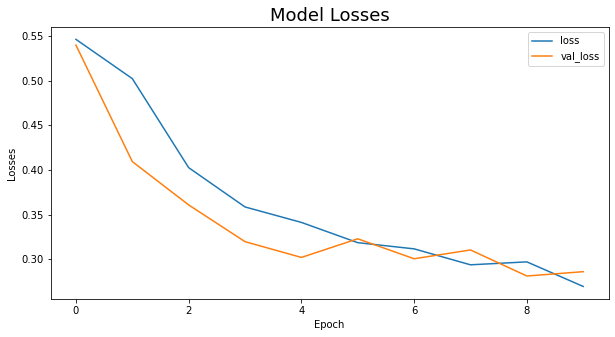

In [51]:
losses[['loss','val_loss']].plot(figsize = (10,5))
plt.title('Model Losses', fontsize = 18)
plt.xlabel('Epoch')
plt.ylabel('Losses')
plt.show()

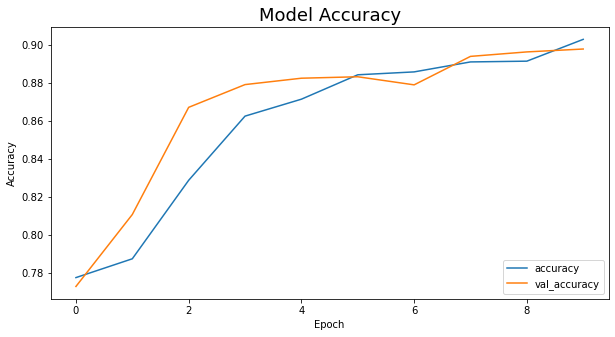

In [52]:
losses[['accuracy','val_accuracy']].plot(figsize=(10,5))
plt.title('Model Accuracy', fontsize = 18)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()